<a href="https://colab.research.google.com/github/ximenaescobar/Actividad-4-Regresi-n-Lineal-Simple-/blob/main/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ximena Escobar
A01640607

In [24]:
# Importar librerías
from turtle import color

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from colorama import Fore, Style


In [3]:
df = pd.read_csv('DF_Mexico.csv')

In [4]:
# Filtramos el df para quedarnos con las columnas que nos interesan

df = df[['host_acceptance_rate', 'host_response_rate', 'review_scores_location', 'review_scores_cleanliness', 'price',
         'availability_365', 'number_of_reviews', 'reviews_per_month', 'review_scores_communication', 'room_type']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  object 
 1   host_response_rate           21133 non-null  object 
 2   review_scores_location       20571 non-null  float64
 3   review_scores_cleanliness    20573 non-null  float64
 4   price                        24224 non-null  object 
 5   availability_365             24224 non-null  int64  
 6   number_of_reviews            24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


In [34]:
df.head(3)

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,room_type
0,91.456246,100.000000,5.00,4.95,1434.0,324.0,21.0,0.19,4.95,Entire home/apt
1,91.456246,94.538778,4.95,4.88,830.0,346.0,61.0,0.54,5.00,Entire home/apt
2,90.000000,100.000000,4.91,4.71,1469.0,87.0,39.0,0.31,4.92,Entire home/apt


#Valores nulos

In [6]:
# Mostrar valores nulos
def df_nulos(df):
    df_nulos = pd.DataFrame({
        'Count of Null Values': df.isnull().sum(),
        'Null Values Percentage %': round(df.isnull().sum() / len(df) * 100, 2),
        'Data Type': df.dtypes,
        'First Value': df.iloc[0]
    })

    return df_nulos

df_nulos(df)

,Count of Null Values,Null Values Percentage %,Data Type,First Value
host_acceptance_rate,2043,8.43,object,NaN
host_response_rate,3091,12.76,object,100%
review_scores_location,3653,15.08,float64,5.0
review_scores_cleanliness,3651,15.07,float64,4.95
price,0,0.00,object,"$1,434.00"
availability_365,0,0.00,int64,324
number_of_reviews,0,0.00,int64,21
reviews_per_month,3596,14.84,float64,0.19
review_scores_communication,3652,15.08,float64,4.95
room_type,0,0.00,object,Entire home/apt


In [7]:
# Cambiamos los valores de las columnas que tienen caracteres para después convertirlos a numerico
# tanto para la columna 'host_acceptance_rate' y 'price'

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')

df['price'] = pd.to_numeric(df['price'])

<ipython-input-7-dbf9e716a767>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [11]:
# Las columnas que tienen el 100% de valores nulos las eliminare

#filtramos las columnas
df_nulos_100 = df_nulos(df).sort_values(by='Null Values Percentage %', ascending=False)
df_nulos_cols = df_nulos_100[df_nulos_100['Null Values Percentage %'] == 100].index
df_nulos_cols

#se eliminan
df = df.drop(df_nulos_cols, axis=1)



In [13]:
# Obtenemos la lista de columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Sustituimos los valores nulos por la media de la columna
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [14]:
# Obtenemos la lista de columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Sustituimos los valores con un bfill y después por un ffill en caso de que haya valores nulos al inicio o al final de la columna
df[cat_cols] = df[cat_cols].fillna(method='bfill').fillna(method='ffill')


In [15]:
# Verificamos que ya no haya valores nulos
df_nulos(df)

,Count of Null Values,Null Values Percentage %,Data Type,First Value
host_acceptance_rate,0,0.0,float64,91.456246
host_response_rate,0,0.0,float64,100.0
review_scores_location,0,0.0,float64,5.0
review_scores_cleanliness,0,0.0,float64,4.95
price,0,0.0,float64,1434.0
availability_365,0,0.0,int64,324
number_of_reviews,0,0.0,int64,21
reviews_per_month,0,0.0,float64,0.19
review_scores_communication,0,0.0,float64,4.95
room_type,0,0.0,object,Entire home/apt


#Valores atípicos

In [16]:
# Sustituimos los outliers de cada columna numérica por el valor de la mediana

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[col] = np.where(df[col] < (Q1 - 1.5 * IQR), df[col].median(), df[col])
    df[col] = np.where(df[col] > (Q3 + 1.5 * IQR), df[col].median(), df[col])

#Correlación

In [17]:
# Mostramos los tipos de habitación que hay

df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [19]:
# Hacemos un df para cada tipo de habitación que escojamos

df_Private_room = df[df['room_type'] == 'Private room']
df_Shared_room = df[df['room_type'] == 'Shared room']

In [35]:
# Creamos una función para mostrar la correlación entre dos variables

def correlacion(df, col_X, col_y):

    # Filtramos el df para quedarnos con las columnas que nos interesan
    df = df[[col_X, col_y]]

    # modelo
    X = df[[col_X]]
    y = df[col_y]
    model = LinearRegression()
    model.fit(X, y)

    print('\n\nModel dict: ', model.__dict__)

    y_pred = model.predict(X)

    #Insertamos la columna de predicciones en el DataFrame
    df.insert(0, 'Predicciones', y_pred)

    #Visualizamos la gráfica comparativa entre el total real y el total predecido
    sns.scatterplot(x=col_X, y=col_y, color="green", data=df)
    sns.scatterplot(x=col_X, y='Predicciones', color="red", data=df)
    sns.lineplot(x=col_X, y='Predicciones', color="red", data=df)
    plt.show()

    #coeficiente de determinación
    coef_det = model.score(X, y)
    print(f'Coeficente de determinación: {coef_det}')

    #coeficiente de correlación
    coef_corr = np.sqrt(coef_det)
    print(f'Coeficiente de correlación: {coef_corr}')

    return coef_det, coef_corr



Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.06663744]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': 91.80410816413188}


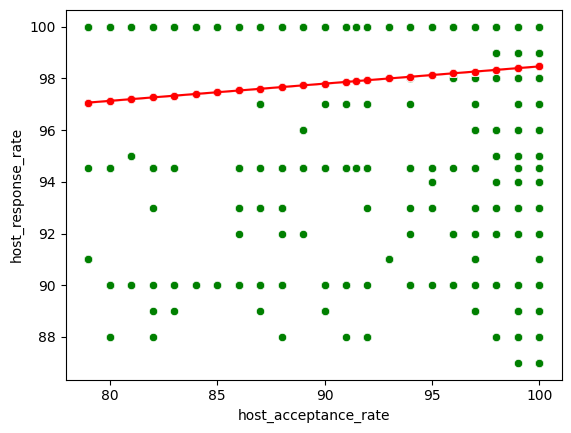

Coeficente de determinación: 0.011105062814228739
Coeficiente de correlación: 0.10538056184244197


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.56192977]), 'rank_': 1, 'singular_': array([8.49805264]), 'intercept_': 2.0732427830279656}


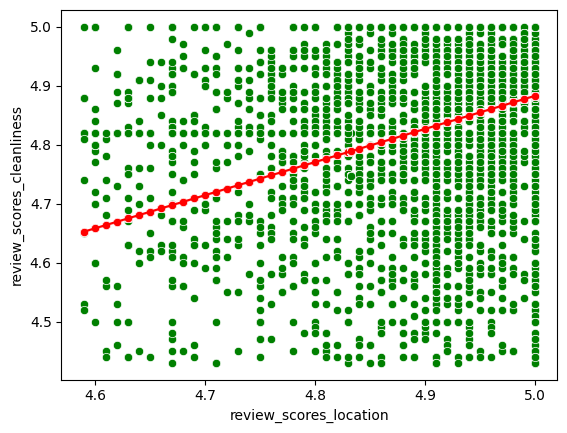

Coeficente de determinación: 0.14732341764373746
Coeficiente de correlación: 0.3838273279011507


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([3.0553817]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': 369.98335913371176}


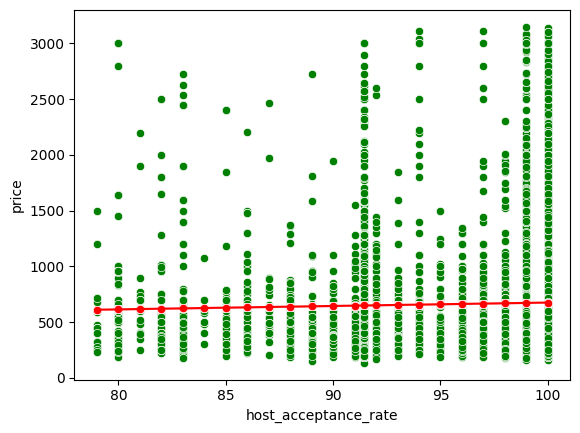

Coeficente de determinación: 0.0008625408064920626
Coeficiente de correlación: 0.02936904503881702


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.01172875]), 'rank_': 1, 'singular_': array([11333.32566802]), 'intercept_': 17.518691728856933}


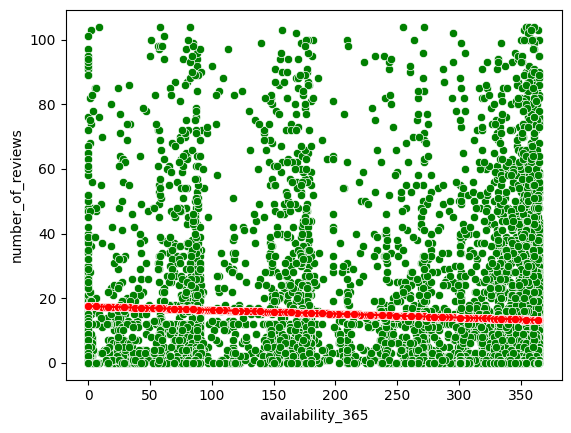

Coeficente de determinación: 0.004821650727525939
Coeficiente de correlación: 0.06943810717124956


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.33298517]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': -17.732792606465225}


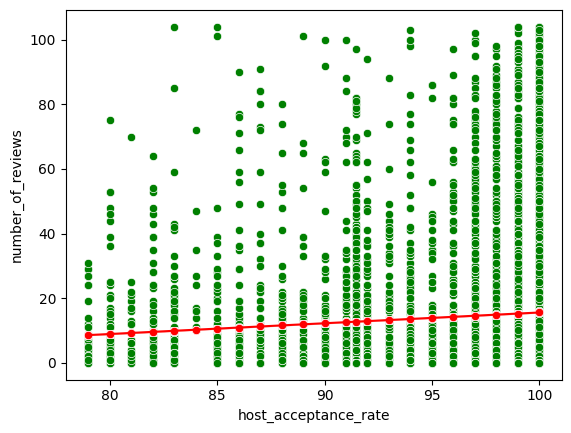

Coeficente de determinación: 0.005260920924889612
Coeficiente de correlación: 0.07253220612176091


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.03318343]), 'rank_': 1, 'singular_': array([83.34517331]), 'intercept_': 4.930303480675583}


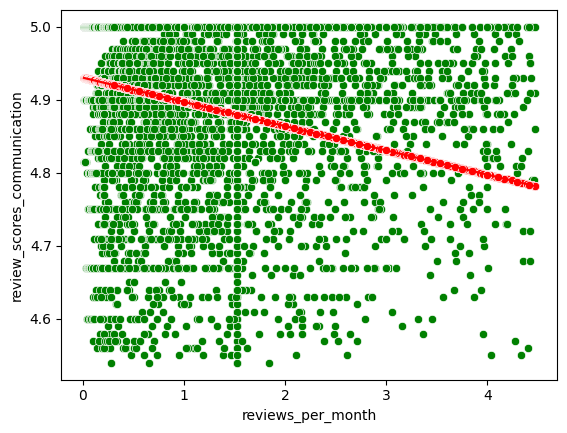

Coeficente de determinación: 0.08770548807758838
Coeficiente de correlación: 0.2961511237148837


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.12583869]), 'rank_': 1, 'singular_': array([75.25974595]), 'intercept_': 86.1798580660968}


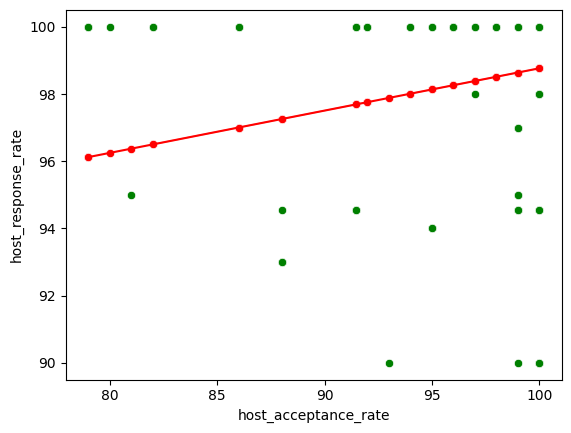

Coeficente de determinación: 0.0443472799502026
Coeficiente de correlación: 0.21058793875766627


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.39199936]), 'rank_': 1, 'singular_': array([1.59276048]), 'intercept_': 2.8760075864246724}


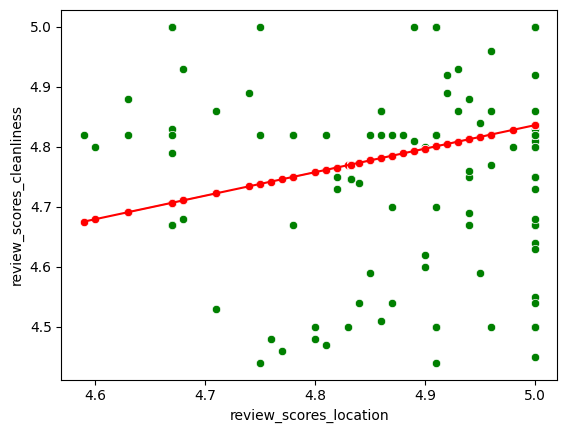

Coeficente de determinación: 0.07503098052105517
Coeficiente de correlación: 0.27391783534676084


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.7484818]), 'rank_': 1, 'singular_': array([75.25974595]), 'intercept_': 532.7261726548037}


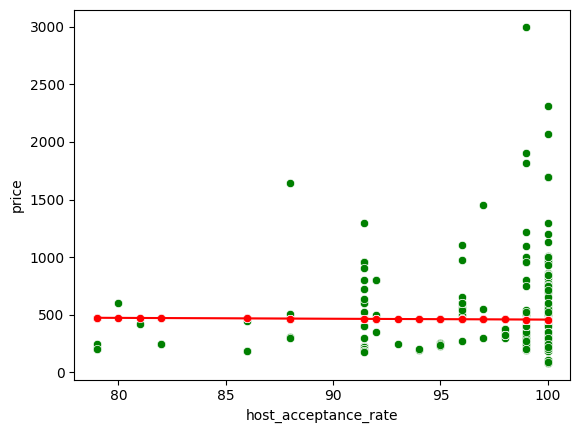

Coeficente de determinación: 6.948154156627417e-05
Coeficiente de correlación: 0.008335558863464055


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.00598895]), 'rank_': 1, 'singular_': array([1834.46262602]), 'intercept_': 9.00107185543288}


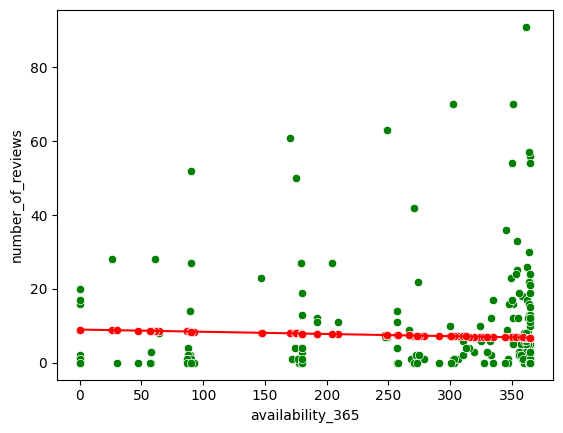

Coeficente de determinación: 0.002307565459284344
Coeficiente de correlación: 0.04803712584329275


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.1584121]), 'rank_': 1, 'singular_': array([75.25974595]), 'intercept_': 22.62510127535439}


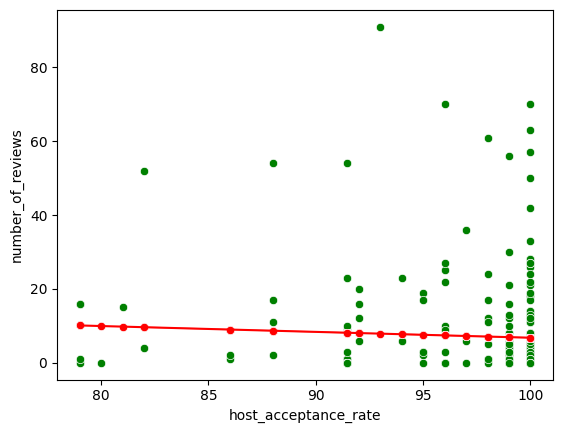

Coeficente de determinación: 0.002717294564641426
Coeficiente de correlación: 0.05212767561134321


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.03947155]), 'rank_': 1, 'singular_': array([14.29703307]), 'intercept_': 4.915787975182522}


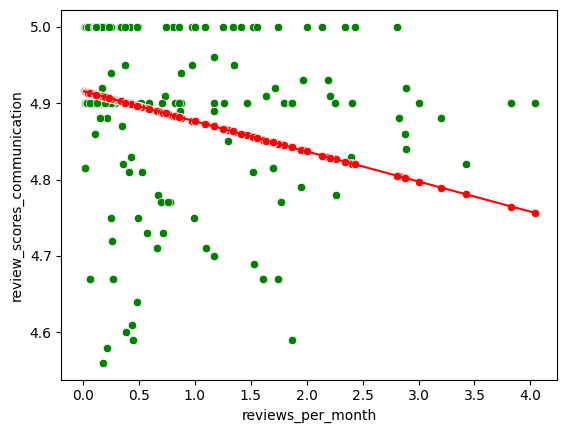

Coeficente de determinación: 0.11815335723596132
Coeficiente de correlación: 0.34373442835416024


In [33]:
# Creamos un diccionario con las columnas que vamos a analizar

cols = {
    'host_acceptance_rate': 'host_response_rate',
    'review_scores_location': 'review_scores_cleanliness',
    'host_acceptance_rate': 'price',
    'availability_365': 'number_of_reviews',
    'host_acceptance_rate': 'number_of_reviews',
    'reviews_per_month': 'review_scores_communication'
}
comparison_list = ['host_acceptance_rate$host_response_rate','review_scores_location$review_scores_cleanliness',
                   'host_acceptance_rate$price', 'availability_365$number_of_reviews', 'host_acceptance_rate$number_of_reviews',
                   'reviews_per_month$review_scores_communication']

# Creamos un diccionario para guardar los coeficientes de determinación y correlación de cada tipo de habitación para convertirlo en df

dict_room_type = {
    'df_Private_room': df_Private_room,
    'df_Shared_room': df_Shared_room
}

dict_dataframe = {
    'room_type': [],
    'metric': [],
    'coef_det': [],
    'coef_corr': []
}

# Iteramos sobre el diccionario de columnas para mostrar la correlación entre cada par de columnas

for i in dict_room_type.keys():

    #for col_X, col_y in cols.items():
    for j in comparison_list:
        col_X, col_y = j.split('$')
        coef_det, coef_corr = correlacion(dict_room_type[i], col_X, col_y)
        dict_dataframe['room_type'].append(i)
        dict_dataframe['metric'].append(j.replace('$', ' vs '))
        dict_dataframe['coef_det'].append(coef_det)
        dict_dataframe['coef_corr'].append(coef_corr)



In [28]:
#Visualizamos en un df

df_coef = pd.DataFrame(dict_dataframe)
df_coef

,room_type,metric,coef_det,coef_corr
0,df_Private_room,host_acceptance_rate vs host_response_rate,0.011105,0.105381
1,df_Private_room,review_scores_location vs review_scores_cleanl...,0.147323,0.383827
2,df_Private_room,host_acceptance_rate vs price,0.000863,0.029369
3,df_Private_room,availability_365 vs number_of_reviews,0.004822,0.069438
4,df_Private_room,host_acceptance_rate vs number_of_reviews,0.005261,0.072532
5,df_Private_room,reviews_per_month vs review_scores_communication,0.087705,0.296151
6,df_Shared_room,host_acceptance_rate vs host_response_rate,0.044347,0.210588
7,df_Shared_room,review_scores_location vs review_scores_cleanl...,0.075031,0.273918
8,df_Shared_room,host_acceptance_rate vs price,0.000069,0.008336
9,df_Shared_room,availability_365 vs number_of_reviews,0.002308,0.048037
